
# Market Microstructure Analysis
**Objective:** Validate input data density, check for session gaps, and analyze volatility regimes.


In [10]:
%pip install matplotlib seaborn

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("../.."))
from s3a_backtester.data_io import load_minute_df

plt.style.use("bmh")

# Load Data (Production NQ)
DATA_PATH = "../../data/vendor_parquet/NQ/NQ.v.0_2024-12-01_2025-11-30_RTH.parquet"

if not os.path.exists(DATA_PATH):
    print("Production data not found. Falling back to synthetic sample.")
    DATA_PATH = "../../data/sample/synth_3d_RTH.parquet"

if os.path.exists(DATA_PATH):
    df = load_minute_df(DATA_PATH, tz="America/New_York")
    print(f"Loaded {len(df)} rows.")
else:
    print("No data found.")
    df = pd.DataFrame()

Note: you may need to restart the kernel to use updated packages.
Loaded 99840 rows.


count    256.0
mean     390.0
std        0.0
min      390.0
25%      390.0
50%      390.0
75%      390.0
max      390.0
dtype: float64


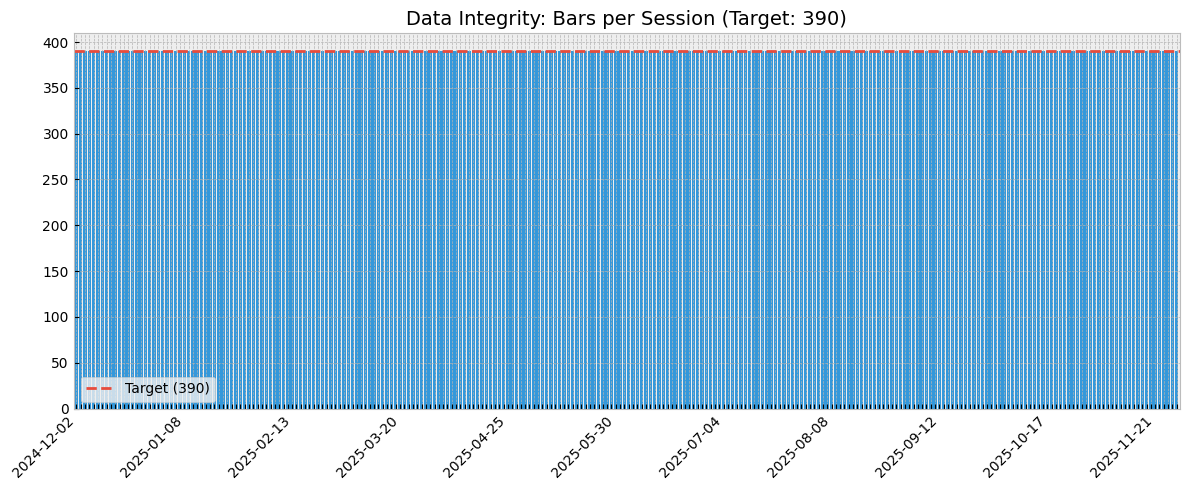

In [11]:
# 1. Session Density Check
# We expect ~390 bars per RTH session (09:30 - 16:00)
if not df.empty:
    counts = df.groupby(df.index.date).size()
    print(counts.describe())

    fig, ax = plt.subplots(figsize=(12, 5))
    counts.plot(kind="bar", color="#3498db", ax=ax, width=0.8)

    ax.set_title("Data Integrity: Bars per Session (Target: 390)", fontsize=14)
    ax.axhline(390, color="#e74c3c", linestyle="--", linewidth=2, label="Target (390)")

    # Fix X-Axis clutter
    # Only show every Nth label to prevent overlap
    n = max(len(counts) // 10, 1)
    for index, label in enumerate(ax.get_xticklabels()):
        if index % n != 0:
            label.set_visible(False)

    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()

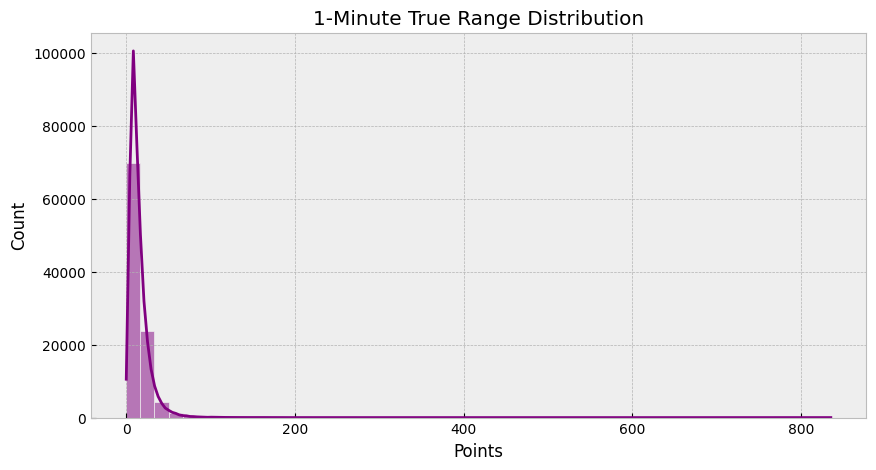

In [12]:
# 2. Volatility Analysis (True Range)
if not df.empty:
    high = df["high"]
    low = df["low"]
    close = df["close"]
    prev_close = close.shift(1)

    tr1 = high - low
    tr2 = (high - prev_close).abs()
    tr3 = (low - prev_close).abs()
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    plt.figure(figsize=(10, 5))
    sns.histplot(true_range, kde=True, bins=50, color="purple")
    plt.title("1-Minute True Range Distribution")
    plt.xlabel("Points")
    plt.show()